In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import json

In [2]:
plt.style.use('seaborn-v0_8-pastel')

In [3]:
with open('../config/cybersource_conection.json', 'r') as file:
    credenciales = json.load(file)

In [4]:
connection_string = f"mssql+pyodbc://{credenciales['USERNAME']}:{credenciales['PASSWORD']}@{credenciales['SERVER']}/{credenciales['DATABASE']}?driver=ODBC+Driver+17+for+SQL+Server&timeout=30"
engine = create_engine(connection_string)

In [5]:
query = """
            SELECT
                BatchDate,
                BillTo_Email,
                BillTo_FirstName,
                BillTo_LastName,
                Status,
                Amount,
                Type,
                TypeDescription,
                AccountSuffix,
                MerchantReferenceNumber
            FROM dbo.Cybersource
            WHERE 
                BatchDate BETWEEN '2022-01-01 00:00:00' AND '2025-12-31 23:59:59'
                AND MerchantReferenceNumber NOT LIKE 'cybs_test%';
            """

df_ingresos = pd.read_sql(query, engine)
df_ingresos.head()

,BatchDate,BillTo_Email,BillTo_FirstName,BillTo_LastName,Status,Amount,Type,TypeDescription,AccountSuffix,MerchantReferenceNumber
0,2022-07-23T05:10:22Z,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,136.88,credit card,MasterCard,1021,cyb_cnp0000000019
1,2022-07-25T05:10:13Z,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,-136.88,credit card,MasterCard,1021,cyb_cnp0000000026
2,2022-07-26T05:10:24Z,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,136.88,credit card,MasterCard,1021,cyb_cnp0000000031
3,2022-07-28T05:10:19Z,mcanale@lyft.com,MEGHAN,CANALE,BATCHED,391.00,credit card,MasterCard,6229,cyb_cnp0000000047
4,2022-07-28T05:10:19Z,trodrigues@lyft.com,TONY,RODRIGUES,BATCHED,234.00,credit card,Visa,1935,cyb_cnp0000000048


In [6]:
df_ingresos['BatchDate'] = pd.to_datetime(df_ingresos['BatchDate'], format='ISO8601', errors='coerce', utc=True)
df_ingresos.head()

,BatchDate,BillTo_Email,BillTo_FirstName,BillTo_LastName,Status,Amount,Type,TypeDescription,AccountSuffix,MerchantReferenceNumber
0,2022-07-23 05:10:22+00:00,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,136.88,credit card,MasterCard,1021,cyb_cnp0000000019
1,2022-07-25 05:10:13+00:00,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,-136.88,credit card,MasterCard,1021,cyb_cnp0000000026
2,2022-07-26 05:10:24+00:00,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,136.88,credit card,MasterCard,1021,cyb_cnp0000000031
3,2022-07-28 05:10:19+00:00,mcanale@lyft.com,MEGHAN,CANALE,BATCHED,391.00,credit card,MasterCard,6229,cyb_cnp0000000047
4,2022-07-28 05:10:19+00:00,trodrigues@lyft.com,TONY,RODRIGUES,BATCHED,234.00,credit card,Visa,1935,cyb_cnp0000000048


In [7]:
# Crear columna de mes
df_ingresos['Dia'] = df_ingresos['BatchDate'].dt.day
df_ingresos['Mes'] = df_ingresos['BatchDate'].dt.month
df_ingresos['Año'] = df_ingresos['BatchDate'].dt.year
df_ingresos.head()

,BatchDate,BillTo_Email,BillTo_FirstName,BillTo_LastName,Status,Amount,Type,TypeDescription,AccountSuffix,MerchantReferenceNumber,Dia,Mes,Año
0,2022-07-23 05:10:22+00:00,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,136.88,credit card,MasterCard,1021,cyb_cnp0000000019,23,7,2022
1,2022-07-25 05:10:13+00:00,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,-136.88,credit card,MasterCard,1021,cyb_cnp0000000026,25,7,2022
2,2022-07-26 05:10:24+00:00,ndurette@lyft.com,NIKOLAS,DURETTE,BATCHED,136.88,credit card,MasterCard,1021,cyb_cnp0000000031,26,7,2022
3,2022-07-28 05:10:19+00:00,mcanale@lyft.com,MEGHAN,CANALE,BATCHED,391.00,credit card,MasterCard,6229,cyb_cnp0000000047,28,7,2022
4,2022-07-28 05:10:19+00:00,trodrigues@lyft.com,TONY,RODRIGUES,BATCHED,234.00,credit card,Visa,1935,cyb_cnp0000000048,28,7,2022


#### Ingresos mensuales por mes

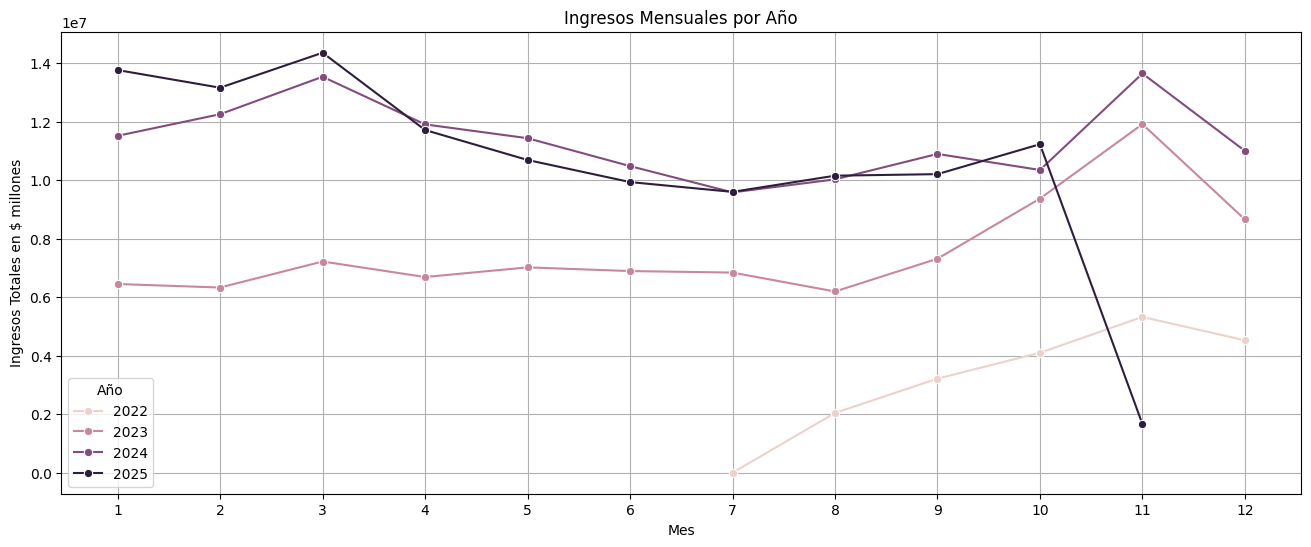

,Año,Mes,Amount
0,2022,7,2928.88
1,2022,8,2045670.34
2,2022,9,3218807.82
3,2022,10,4102933.80
4,2022,11,5326569.98
5,2022,12,4528953.37
6,2023,1,6452855.80
7,2023,2,6332197.79
8,2023,3,7221700.70
9,2023,4,6691626.27


In [14]:
# Agrupar por mes y graficar momtos mensuales
ingresos_mensuales = df_ingresos.groupby(['Año', 'Mes'])['Amount'].sum().reset_index()
plt.figure(figsize=(16,6))
sns.lineplot(data=ingresos_mensuales, x='Mes', y='Amount', hue='Año', marker='o')
plt.title('Ingresos Mensuales por Año')
plt.xlabel('Mes')
plt.ylabel('Ingresos Totales en $ millones')
plt.xticks(range(1,13))
plt.legend(title='Año')
plt.grid()
plt.show()

ingresos_mensuales


In [9]:
# Agrupar por email y obtener ingreso total por usuario
ingresos_por_usuario = df_ingresos.groupby('BillTo_Email')['Amount'].sum().reset_index()
ingresos_por_usuario = ingresos_por_usuario.sort_values(by='Amount', ascending=False)
ingresos_por_usuario.head(10)


,BillTo_Email,Amount
220971,gama_sussoni@hotmail.com,36019.00
481005,ricardo.nieto.bautista@gmail.com,27592.95
572233,yessica_vgat@hotmail.com,22198.88
237035,guillermotvalencia@gmail.com,22004.69
570625,yaridtrejo@hotmail.com,19834.78
41389,amedrakkar@gmail.com,18904.55
491744,romanalonso0403@outlook.com,18623.73
333353,lacume@gmail.com,18546.00
429340,nenodarua@hotmail.com,17867.73
100124,carlasal77@hotmail.com,17632.00


In [10]:
ingresos_por_usuario['Amount'].describe()

count    579303.000000
mean        627.086228
std         652.617521
min        -118.000000
25%         130.550000
50%         521.000000
75%        1042.000000
max       36019.000000
Name: Amount, dtype: float64

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_20160\284687978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_mensuales_año, x='Año', y='Amount', palette='viridis')


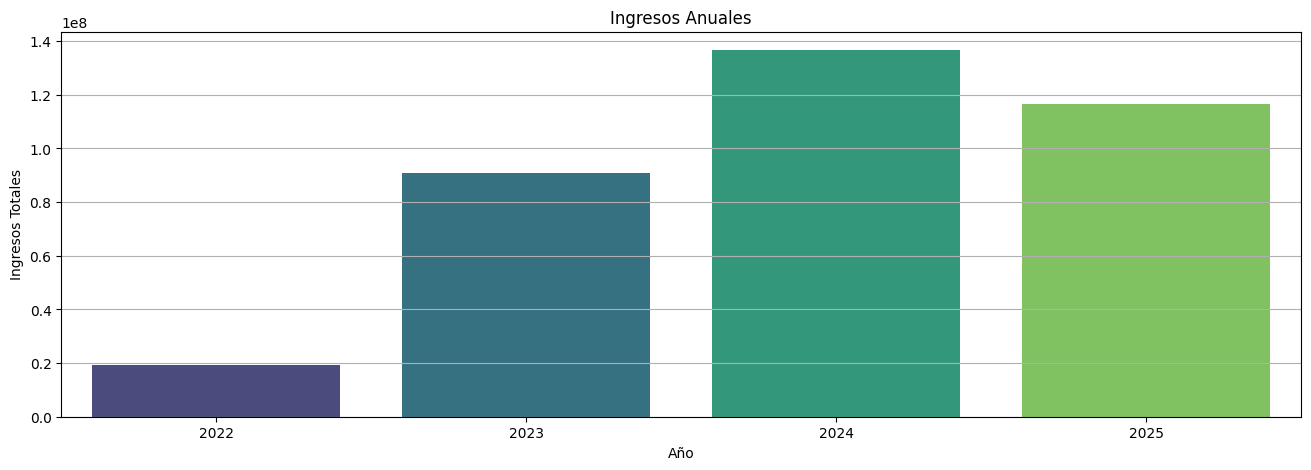

In [11]:
# Agrupar por año
ingresos_mensuales_año = df_ingresos.groupby(['Año'])['Amount'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(data=ingresos_mensuales_año, x='Año', y='Amount', palette='viridis')
plt.title('Ingresos Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos Totales')
plt.grid(axis='y')
plt.show()

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_20160\2794748695.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_mensuales_año, x='Mes', y='Amount',
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_20160\2794748695.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_mensuales_año, x='Mes', y='Amount',
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_20160\2794748695.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_mensuales_año, x='Mes', y='Amount',
C:\Users\victor.briones\AppD

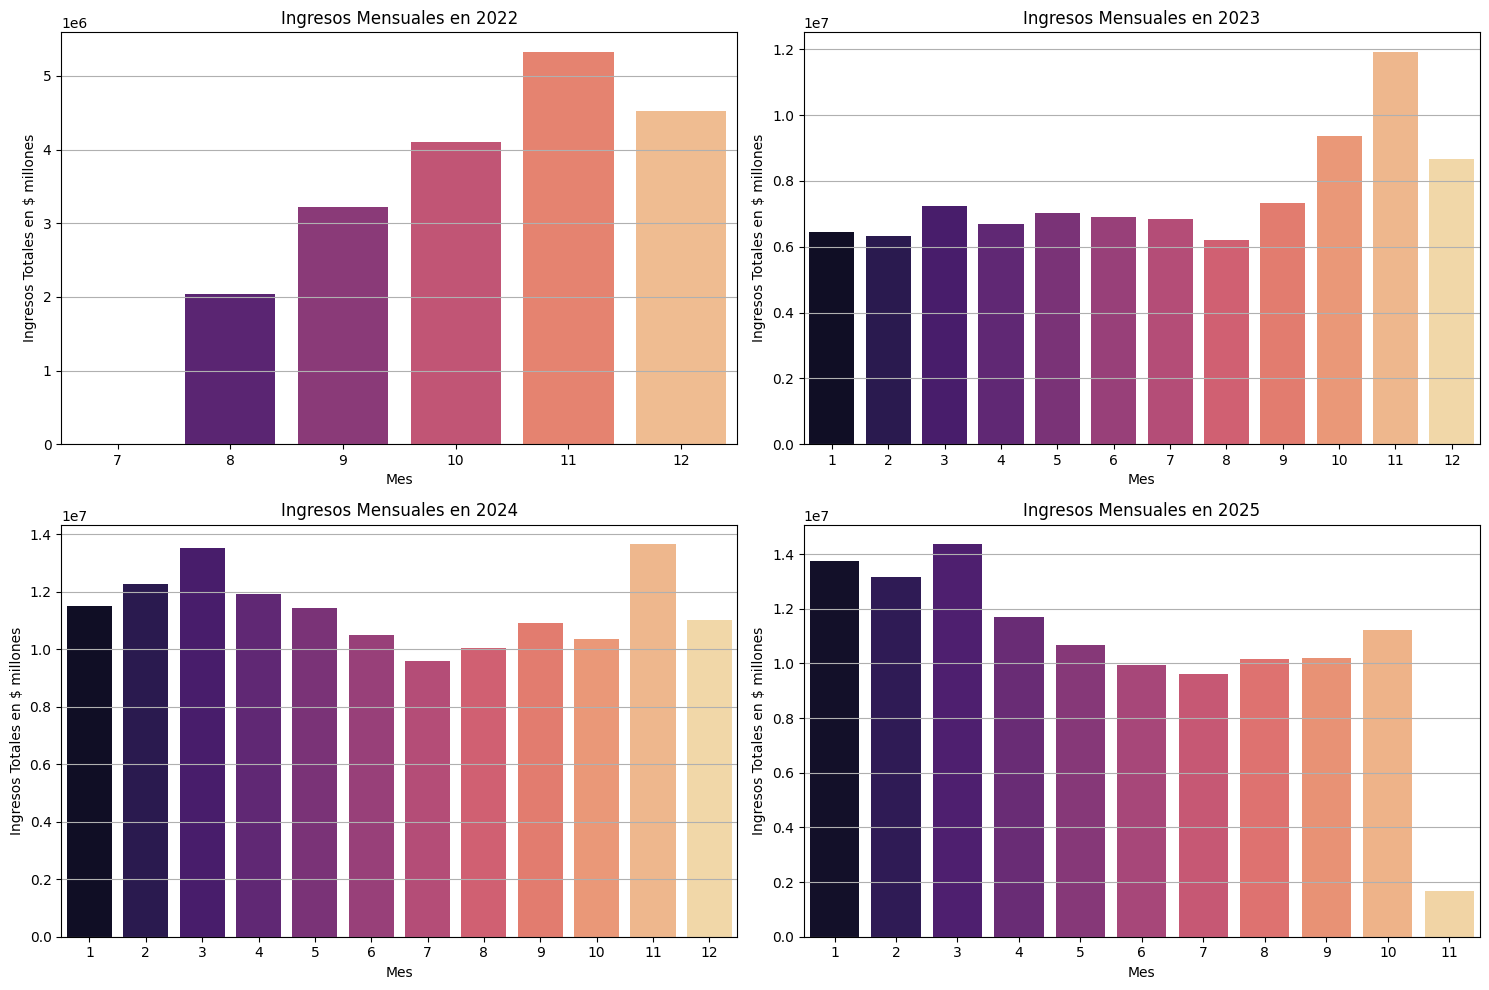

In [12]:
# Obtener la lista de años únicos
años_unicos = sorted(ingresos_mensuales['Año'].unique())
n_años = len(años_unicos)

# Calcular disposición de subplots
filas = (n_años + 1) // 2  # Redondeo hacia arriba
columnas = 2 if n_años > 1 else 1

# Crear figura con subplots
fig, axes = plt.subplots(filas, columnas, figsize=(15, 5 * filas))
axes = axes.flatten() if n_años > 1 else [axes]

# Generar gráficas para cada año
for i, año in enumerate(años_unicos):
    if i < len(axes):  # Verificar que tenemos suficientes ejes
        ingresos_mensuales_año = ingresos_mensuales[ingresos_mensuales['Año'] == año]
        
        sns.barplot(data=ingresos_mensuales_año, x='Mes', y='Amount', 
                   palette='magma', ax=axes[i])
        axes[i].set_title(f'Ingresos Mensuales en {año}')
        axes[i].set_xlabel('Mes')
        axes[i].set_ylabel('Ingresos Totales en $ millones')
        axes[i].grid(axis='y')

# Ocultar ejes vacíos si los hay
for j in range(len(años_unicos), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
import json

# Obtener la lista de años únicos
años_unicos = sorted(ingresos_mensuales['Año'].unique())

# Crear estructura de datos
resultados = {
    "resumen_general": {
        "total_años": len(años_unicos),
        "años_analizados": [int(año) for año in años_unicos],  # Corregido aquí
        "total_general": float(ingresos_mensuales['Amount'].sum())
    },
    "datos_por_año": {}
}

# Agregar datos por año
for año in años_unicos:
    datos_año = ingresos_mensuales[ingresos_mensuales['Año'] == año]
    total_anual = datos_año['Amount'].sum()
    
    resultados["datos_por_año"][str(año)] = {
        "total_anual": float(total_anual),
        "promedio_mensual": float(total_anual / 12),
        "meses": []
    }
    
    for _, fila in datos_año.iterrows():
        resultados["datos_por_año"][str(año)]["meses"].append({
            "mes": fila['Mes'],
            "ingresos": float(fila['Amount'])
        })

# Imprimir JSON formateado
print(json.dumps(resultados, indent=2, ensure_ascii=False))

{
  "resumen_general": {
    "total_años": 4,
    "años_analizados": [
      2022,
      2023,
      2024,
      2025
    ],
    "total_general": 363272932.9
  },
  "datos_por_año": {
    "2022": {
      "total_anual": 19225864.19,
      "promedio_mensual": 1602155.3491666669,
      "meses": [
        {
          "mes": 7.0,
          "ingresos": 2928.88
        },
        {
          "mes": 8.0,
          "ingresos": 2045670.34
        },
        {
          "mes": 9.0,
          "ingresos": 3218807.82
        },
        {
          "mes": 10.0,
          "ingresos": 4102933.8
        },
        {
          "mes": 11.0,
          "ingresos": 5326569.98
        },
        {
          "mes": 12.0,
          "ingresos": 4528953.37
        }
      ]
    },
    "2023": {
      "total_anual": 90917621.93,
      "promedio_mensual": 7576468.494166668,
      "meses": [
        {
          "mes": 1.0,
          "ingresos": 6452855.8
        },
        {
          "mes": 2.0,
          "ingresos